In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd

In [18]:
# 데이터 준비
data = {
    'Fix': [
        'workaround', 'identical', 'identical', 'alternatives', 'identical', 'workaround', 'workaround',
        'incorrect', 'incorrect', 'alternatives', 'equivalent', 'equivalent', 'equivalent', 'incorrect',
        'incorrect', 'alternatives', 'incorrect', 'alternatives', 'incorrect', 'alternatives', 'incorrect',
        'incorrect', 'workaround', 'workaround', 'equivalent', 'equivalent', 'incorrect', 'alternatives',
        'alternatives', 'equivalent', 'identical', 'identical', 'alternatives', 'alternatives', 'incorrect',
        'incorrect', 'alternatives', 'workaround', 'workaround', 'identical', 'identical', 'identical',
        'identical', 'alternatives', 'alternatives', 'incorrect', 'incorrect', 'alternatives', 'equivalent',
        'identical', 'identical', 'incorrect', 'incorrect', 'alternatives', 'incorrect', 'identical',
        'workaround', 'alternatives', 'incorrect', 'incorrect', 'workaround', 'equivalent', 'equivalent',
        'incorrect', 'incorrect', 'incorrect', 'incorrect', 'identical', 'identical', 'equivalent',
        'alternatives', 'identical', 'workaround', 'incorrect', 'equivalent', 'incorrect'
    ],
    'w/o code': [
        320, 332, 342, 288, 242, 302, 330, 3021, 349, 338, 250, 301, 323, 350, 315, 663, 631, 330, 1287, 666,
        360, 1134, 1069, 701, 312, 740, 1026, 302, 247, 293, 294, 305, 672, 598, 840, 719, 505, 293, 606, 268,
        386, 450, 232, 262, 251, 3214, 522, 236, 273, 298, 373, 359, 251, 436, 524, 281, 653, 839, 266, 589,
        856, 235, 238, 569, 708, 246, 204, 206, 196, 199, 323, 538, 748, 471, 278, 229
    ]
}

df = pd.DataFrame(data)

# 라벨링 추가 (correct = 0, incorrect = 1)
correct_labels = ['identical', 'equivalent', 'alternatives']
df['Label'] = df['Fix'].apply(lambda x: 0 if x in correct_labels else 1)

# 특징과 라벨 분리
X = df[['w/o code']]
y = df['Label']

## 전처리 없이 Logistic Regression

```
LR Accuracy: 0.6875
LR Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.60      0.86      0.71         7

    accuracy                           0.69        16
   macro avg       0.72      0.71      0.69        16
weighted avg       0.73      0.69      0.68        16

LR - Performance Metrics:
ROC-AUC: 0.7936507936507937
Confusion Matrix:
 [[5 4]
 [1 6]]
Precision: 0.6
Recall: 0.8571428571428571
F1 Score: 0.7058823529411765
```



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 모델과 하이퍼파라미터 설정
params = {
    'penalty': ['l1', 'l2'],  # 규제 방식
    'C': [0.1, 1, 10],  # 규제 강도
    'solver': ['liblinear']  # 작은 데이터셋에 적합한 해법
}

# GridSearchCV 실행
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=params,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
lr_best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}\n")

# 평가: ROC-AUC
y_pred_proba = lr_best_model.predict_proba(X_test)[:, 1]  # AUC 점수를 위해 확률 예측
auc_score = roc_auc_score(y_test, y_pred_proba)

# 성능 평가
y_pred = lr_best_model.predict(X_test)
print("LR Accuracy:", accuracy_score(y_test, y_pred))
print("LR Classification Report:\n", classification_report(y_test, y_pred))

confusion_lr = confusion_matrix(y_test,y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)

print("LR - Performance Metrics:")
print("ROC-AUC:", auc_score)
print("Confusion Matrix:\n", confusion_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

LR Accuracy: 0.6875
LR Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.60      0.86      0.71         7

    accuracy                           0.69        16
   macro avg       0.72      0.71      0.69        16
weighted avg       0.73      0.69      0.68        16

LR - Performance Metrics:
ROC-AUC: 0.7936507936507937
Confusion Matrix:
 [[5 4]
 [1 6]]
Precision: 0.6
Recall: 0.8571428571428571
F1 Score: 0.7058823529411765


Decision Boundary (w/o code): 379.61


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


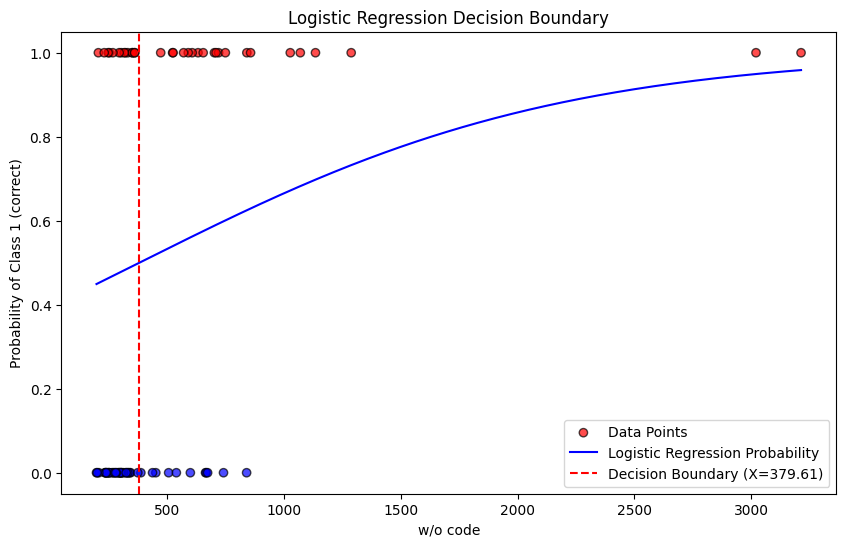

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 결정 경계 계산
w = lr_best_model.coef_[0][0]  # 가중치
b = lr_best_model.intercept_[0]  # 절편
decision_boundary = -b / w

print(f"Decision Boundary (w/o code): {decision_boundary:.2f}")

# 결정 경계 시각화
x_range = np.linspace(X['w/o code'].min(), X['w/o code'].max(), 500).reshape(-1, 1)
y_prob = lr_best_model.predict_proba(x_range)[:, 1]  # Class 1 확률

plt.figure(figsize=(10, 6))

# 데이터 산점도
plt.scatter(X['w/o code'], y, c=y, cmap='bwr', alpha=0.7, edgecolors='k', label="Data Points")

# 확률 곡선
plt.plot(x_range, y_prob, label="Logistic Regression Probability", color='blue')

# 결정 경계 표시
plt.axvline(decision_boundary, color='red', linestyle='--', label=f"Decision Boundary (X={decision_boundary:.2f})")

# 그래프 설정
plt.xlabel("w/o code")
plt.ylabel("Probability of Class 1 (correct)")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()

## 전처리하여 LR


In [30]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 모델과 하이퍼파라미터 설정
params = {
    'penalty': ['l1', 'l2'],  # 규제 방식
    'C': [0.1, 1, 10],  # 규제 강도
    'solver': ['liblinear']  # 작은 데이터셋에 적합한 해법
}

# GridSearchCV 실행
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=params,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
lr_best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}\n")

# 평가: ROC-AUC
y_pred_proba = lr_best_model.predict_proba(X_test)[:, 1]  # AUC 점수를 위해 확률 예측
auc_score = roc_auc_score(y_test, y_pred_proba)

# 성능 평가
y_pred = lr_best_model.predict(X_test)
print("LR Accuracy:", accuracy_score(y_test, y_pred))
print("LR Classification Report:\n", classification_report(y_test, y_pred))

confusion_lr = confusion_matrix(y_test,y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)

print("LR - Performance Metrics:")
print("ROC-AUC:", auc_score)
print("Confusion Matrix:\n", confusion_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

LR Accuracy: 0.7058823529411765
LR Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.67      0.75      0.71         8

    accuracy                           0.71        17
   macro avg       0.71      0.71      0.71        17
weighted avg       0.71      0.71      0.71        17

LR - Performance Metrics:
ROC-AUC: 0.7361111111111112
Confusion Matrix:
 [[6 3]
 [2 6]]
Precision: 0.6666666666666666
Recall: 0.75
F1 Score: 0.7058823529411765


### 전처리 후 LR 결과

```
LR Accuracy: 0.7058823529411765
LR Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.67      0.75      0.71         8

    accuracy                           0.71        17
   macro avg       0.71      0.71      0.71        17
weighted avg       0.71      0.71      0.71        17

LR - Performance Metrics:
ROC-AUC: 0.7361111111111112
Confusion Matrix:
 [[6 3]
 [2 6]]
Precision: 0.6666666666666666
Recall: 0.75
F1 Score: 0.7058823529411765
```


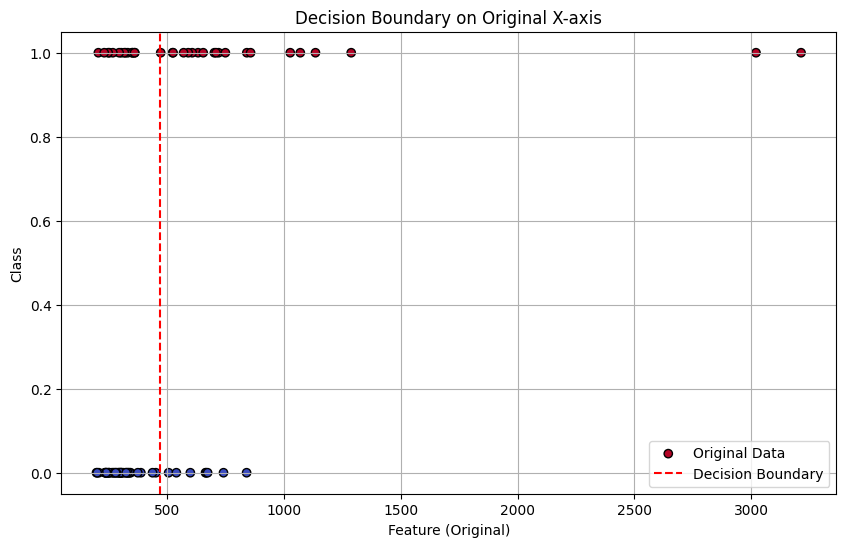

결정 경계 (원본 feature 값): [467.89189189]


In [36]:
import numpy as np
import matplotlib.pyplot as plt
# 1. 스케일링 복원
# 결정 경계 계산 (스케일된 데이터에서)
x_min, x_max = X_scaled.min(), X_scaled.max()
x_values_scaled = np.linspace(x_min, x_max, 1000).reshape(-1, 1)

# 모델 예측
y_pred = lr_best_model.predict(x_values_scaled)

# 클래스 변화 지점 찾기
decision_boundary_scaled = x_values_scaled[np.where(np.diff(y_pred) != 0)[0]]

# 원본 데이터로 변환
decision_boundary_original = scaler.inverse_transform(decision_boundary_scaled)

# 2. 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X['w/o code'], y, c=y, cmap='coolwarm', edgecolors='k', label='Original Data')
plt.axvline(decision_boundary_original[0], color='red', linestyle='--', label='Decision Boundary')
plt.title('Decision Boundary on Original X-axis')
plt.xlabel('Feature (Original)')
plt.ylabel('Class')
plt.legend()
plt.grid()
plt.show()

print(f"결정 경계 (원본 feature 값): {decision_boundary_original.flatten()}")